In [155]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

matplotlib.rcParams['figure.figsize'] = (10,7)

In [156]:
#Function to load an image and display it
def read_image_file(image_file):
    img = cv2.imread(image_file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original Image')
    return img

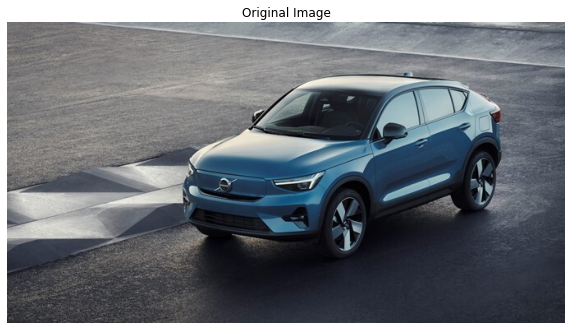

In [157]:
image_file = 'car_image.jpg'
org_img = read_image_file(image_file)

# Creating Edge Mask i.e. emphasising the edges

In [158]:
#Using Adaptive Threshold for creating edge mask
def edge_mask(org_img,line_size,blur_value):
    gray_image = cv2.cvtColor(org_img, cv2.COLOR_RGB2GRAY)
    gray_blur_image = cv2.medianBlur(gray_image, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size,blur_value)
    return edges


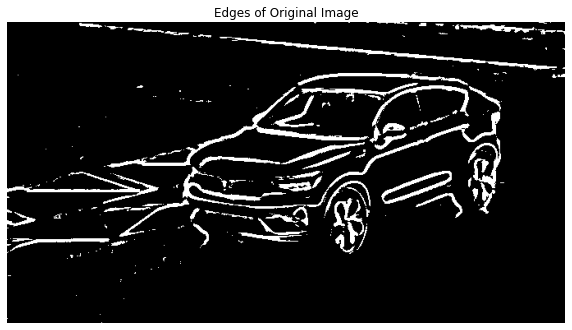

In [159]:
line_size = 9
blur_value = 7
edges = edge_mask(org_img,line_size,blur_value)

plt.imshow(edges,cmap='binary')
plt.title('Edges of Original Image')
plt.axis('off')
plt.show()

# Setting the required number of colors

In [160]:
def reqd_image(img,k):
    data = np.float32(org_img).reshape((-1,3))
    crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret,label,center = cv2.kmeans(data,k,None,crt,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(org_img.shape)
    return result

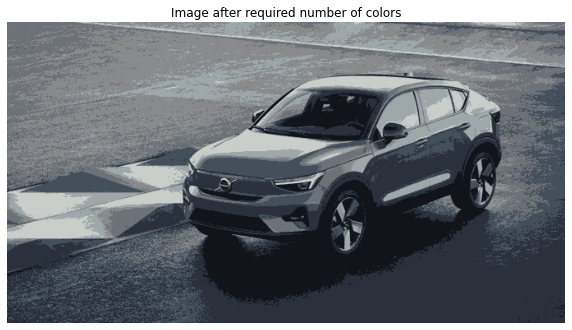

In [161]:
new_img = reqd_image(org_img,7)
plt.imshow(new_img)
plt.axis('off')
plt.title('Image after required number of colors')
plt.show()

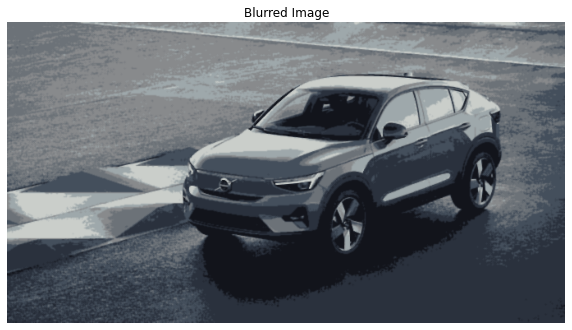

In [162]:
#Reducing noise using Bilateral Filter
blurred_img = cv2.bilateralFilter(new_img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred_img)
plt.axis('off')
plt.title('Blurred Image')
plt.show()

# Combining modified image and edges

In [163]:
#Combining the blurred image and edges for better look
crtn_img = cv2.bitwise_and(blurred_img,blurred_img,mask = edges)  

# plt.savefig('car_cartoon.png', dpi=300)  

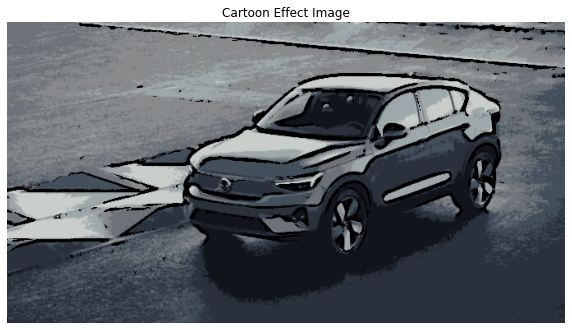

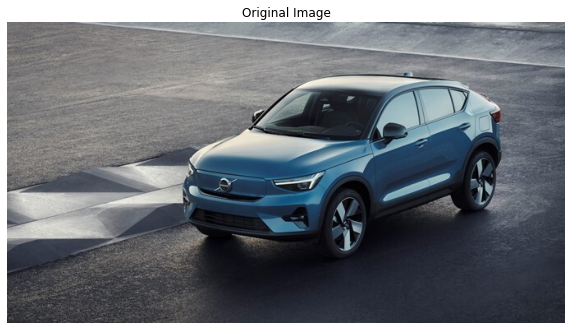

In [164]:
#Plotting of Cartoon Effect Image and Original Image
plt.imshow(crtn_img)
plt.axis('off')
plt.savefig('cartoon.jpg', dpi=300, bbox_inches='tight')
plt.title('Cartoon Effect Image')
plt.show()

plt.imshow(org_img)
plt.axis('off')
plt.title('Original Image')
plt.show()